In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import seaborn as sns

# Scrape HTML

In [133]:
url = "https://sortitoutsi.net/football-manager-2022/database"
content = requests.get(url)

In [134]:
soup = BeautifulSoup(content.text, 'html.parser')

In [135]:
row = soup.find('tr') # Extract and return first occurrence of tr
print(row)            # Print row with HTML formatting
print("=========Text Result==========")
print(row.get_text()) # Print row as text

<tr>
<th class="head-icon">#</th>
<th class="head-title">Name</th>
<th>Nickname</th>
<th>Reputation</th>
<th>Youth Rating</th>
<th>Game Importance</th>
<th>Gain Nationality</th>
<th>Avg Attendance</th>
</tr>
=========Text Result==========

#
Name
Nickname
Reputation
Youth Rating
Game Importance
Gain Nationality
Avg Attendance



In [136]:
rows = soup.find_all('tr')
for row in rows:          # Print all occurrences
    print(row.get_text())


#
Name
Nickname
Reputation
Youth Rating
Game Importance
Gain Nationality
Avg Attendance







                    Afghanistan
                


                The Lions of Khorasan
            

                37
            

                19
            

                3
            



                8000
            







                    Albania
                


                Kuq e Zinjtë
            

                111
            

                65
            

                1
            

                5
            

                14800
            







                    Algeria
                


                Les Fennecs
            

                117
            

                102
            

                1
            

                7
            

                60000
            







                    American Samoa
                


                The Boys from the Territory
            

                4
    

In [162]:
table  = soup.find_all('table')

In [138]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td class="row-icon">
<img src="https://sortitoutsi.net/uploads/nation_sm/55.png" style="min-width:25px;min-height:18px;"/>
</td>, <td class="row-title">
<a class="item-title" href="https://sortitoutsi.net/football-manager-2022/nation/55/zimbabwe">
                    Zimbabwe
                </a>
</td>, <td>
                The Warriors
            </td>, <td>
                60
            </td>, <td>
                44
            </td>, <td>
                1
            </td>, <td>
                10
            </td>, <td>
                27000
            </td>]


bs4.element.ResultSet

In [139]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, 'lxml').get_text()
print(cleantext)

[

, 

                    Zimbabwe
                
, 
                The Warriors
            , 
                60
            , 
                44
            , 
                1
            , 
                10
            , 
                27000
            ]


In [140]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[

, 

                    Zimbabwe
                
, 
                The Warriors
            , 
                60
            , 
                44
            , 
                1
            , 
                10
            , 
                27000
            ]


str

# Create DF with table values

In [141]:
df = pd.DataFrame(list_rows)

In [142]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7
0,[],None,None,None,None,None,None,None
1,[\n\n,\n\n Afghanistan\n ...,\n The Lions of Khorasan\n ...,\n 37\n,\n 19\n,\n 3\n,\n,\n 8000\n ]
2,[\n\n,\n\n Albania\n ...,\n Kuq e Zinjtë\n,\n 111\n,\n 65\n,\n 1\n,\n 5\n,\n 14800\n ]
3,[\n\n,\n\n Algeria\n ...,\n Les Fennecs\n,\n 117\n,\n 102\n,\n 1\n,\n 7\n,\n 60000\n ]
4,[\n\n,\n\n American Samoa\n ...,\n The Boys from the Territory...,\n 4\n,\n 5\n,\n 4\n,\n,\n]
5,[\n\n,\n\n Andorra\n ...,\n Los Tricolor\n,\n 51\n,\n 36\n,\n 4\n,\n 20\n,\n]
6,[\n\n,\n\n Angola\n ...,\n Palancas Negras\n,\n 85\n,\n 75\n,\n 1\n,\n 10\n,\n 48000\n ]
7,[\n\n,\n\n Anguilla\n ...,\n,\n 5\n,\n 8\n,\n 3\n,\n 5\n,\n]
8,[\n\n,\n\n Antigua and Barbuda\n...,\n Benna Boys\n,\n 42\n,\n 30\n,\n 2\n,\n 7\n,\n]
9,[\n\n,\n\n Argentina\n ...,\n La Albiceleste\n,\n 182\n,\n 140\n,\n 1\n,\n 2\n,\n 50000\n ]


# Tidy Strings

In [143]:
df1[1] = df1[1].str.strip(' \n\n')
df1[2] = df1[2].str.strip(' \n')
df1[3] = df1[3].str.strip(' \n')
df1[4] = df1[4].str.strip(' \n')
df1[5] = df1[5].str.strip(' \n')
df1[6] = df1[6].str.strip(' \n')
df1[7] = df1[7].str.strip(' \n')

df1.head()

,0,1,2,3,4,5,6,7
0,[],None,None,None,None,None,None,None
1,[\n\n,Afghanistan,The Lions of Khorasan,37,19,3,,8000\n ]
2,[\n\n,Albania,Kuq e Zinjtë,111,65,1,5,14800\n ]
3,[\n\n,Algeria,Les Fennecs,117,102,1,7,60000\n ]
4,[\n\n,American Samoa,The Boys from the Territory,4,5,4,,]


# Find and add headings

In [144]:
col_labels = soup.find_all('th')


In [145]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[#, Name, Nickname, Reputation, Youth Rating, Game Importance, Gain Nationality, Avg Attendance]']


In [146]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[#, Name, Nickname, Reputation, Youth Rating, ..."


In [147]:
df2 = df2[0].str.split(',', expand=True)
df2.head()

,0,1,2,3,4,5,6,7
0,[#,Name,Nickname,Reputation,Youth Rating,Game Importance,Gain Nationality,Avg Attendance]


In [148]:
frames = [df2, df1]

df2 = pd.concat(frames)
df2.head(10)

,0,1,2,3,4,5,6,7
0,[#,Name,Nickname,Reputation,Youth Rating,Game Importance,Gain Nationality,Avg Attendance]
0,[],None,None,None,None,None,None,None
1,[\n\n,Afghanistan,The Lions of Khorasan,37,19,3,,8000\n ]
2,[\n\n,Albania,Kuq e Zinjtë,111,65,1,5,14800\n ]
3,[\n\n,Algeria,Les Fennecs,117,102,1,7,60000\n ]
4,[\n\n,American Samoa,The Boys from the Territory,4,5,4,,]
5,[\n\n,Andorra,Los Tricolor,51,36,4,20,]
6,[\n\n,Angola,Palancas Negras,85,75,1,10,48000\n ]
7,[\n\n,Anguilla,,5,8,3,5,]
8,[\n\n,Antigua and Barbuda,Benna Boys,42,30,2,7,]


In [149]:
df = df2.rename(columns=df2.iloc[0])
df.head()

,[#,Name,Nickname,Reputation,Youth Rating,Game Importance,Gain Nationality,Avg Attendance]
0,[#,Name,Nickname,Reputation,Youth Rating,Game Importance,Gain Nationality,Avg Attendance]
0,[],None,None,None,None,None,None,None
1,[\n\n,Afghanistan,The Lions of Khorasan,37,19,3,,8000\n ]
2,[\n\n,Albania,Kuq e Zinjtë,111,65,1,5,14800\n ]
3,[\n\n,Algeria,Les Fennecs,117,102,1,7,60000\n ]


# Clear data into usable columns

In [150]:
df = df.drop(df.index[0])
df.head()

,[#,Name,Nickname,Reputation,Youth Rating,Game Importance,Gain Nationality,Avg Attendance]
1,[\n\n,Afghanistan,The Lions of Khorasan,37,19,3,,8000\n ]
2,[\n\n,Albania,Kuq e Zinjtë,111,65,1,5,14800\n ]
3,[\n\n,Algeria,Les Fennecs,117,102,1,7,60000\n ]
4,[\n\n,American Samoa,The Boys from the Territory,4,5,4,,]
5,[\n\n,Andorra,Los Tricolor,51,36,4,20,]


In [151]:
df.drop('[#', axis=1)

,Name,Nickname,Reputation,Youth Rating,Game Importance,Gain Nationality,Avg Attendance]
1,Afghanistan,The Lions of Khorasan,37,19,3,,8000\n ]
2,Albania,Kuq e Zinjtë,111,65,1,5,14800\n ]
3,Algeria,Les Fennecs,117,102,1,7,60000\n ]
4,American Samoa,The Boys from the Territory,4,5,4,,]
5,Andorra,Los Tricolor,51,36,4,20,]
...,...,...,...,...,...,...,...
247,Yugoslavia,Plavi,,,,5,]
248,Zaire,,,,,,]
249,Zambia,Chipolopolo,102,61,1,,40000\n ]
250,Zanzibar,The Zanzibar Heroes,10,7,2,,]


In [152]:
df.columns

Index(['[#', ' Name', ' Nickname', ' Reputation', ' Youth Rating',
       ' Game Importance', ' Gain Nationality', ' Avg Attendance]'],
      dtype='object')

In [153]:
df[' Avg Attendance]'] = df[' Avg Attendance]'].str.strip(']')
df[' Avg Attendance]'] = df[' Avg Attendance]'].str.strip('\n ')
df.head()

df.drop('[#', axis=1)

,Name,Nickname,Reputation,Youth Rating,Game Importance,Gain Nationality,Avg Attendance]
1,Afghanistan,The Lions of Khorasan,37,19,3,,8000
2,Albania,Kuq e Zinjtë,111,65,1,5,14800
3,Algeria,Les Fennecs,117,102,1,7,60000
4,American Samoa,The Boys from the Territory,4,5,4,,
5,Andorra,Los Tricolor,51,36,4,20,
...,...,...,...,...,...,...,...
247,Yugoslavia,Plavi,,,,5,
248,Zaire,,,,,,
249,Zambia,Chipolopolo,102,61,1,,40000
250,Zanzibar,The Zanzibar Heroes,10,7,2,,


In [154]:
df = df.rename(columns={' Avg Attendance]': 'AvgAttendance'})
df = df.rename(columns={' Name': 'Name'})
df = df.rename(columns={' Nickname': 'Nickname'})
df.head()

,[#,Name,Nickname,Reputation,Youth Rating,Game Importance,Gain Nationality,AvgAttendance
1,[\n\n,Afghanistan,The Lions of Khorasan,37,19,3,,8000
2,[\n\n,Albania,Kuq e Zinjtë,111,65,1,5,14800
3,[\n\n,Algeria,Les Fennecs,117,102,1,7,60000
4,[\n\n,American Samoa,The Boys from the Territory,4,5,4,,
5,[\n\n,Andorra,Los Tricolor,51,36,4,20,


In [155]:
df = df.rename(columns={' Youth Rating': 'YouthRating'})
df = df.rename(columns={' Game Importance': 'GameImportance'})
df = df.rename(columns={' GainNationality': 'GainNationality'})

In [156]:
df = df.drop('[#', axis=1)

In [157]:
display(df)

,Name,Nickname,Reputation,YouthRating,GameImportance,Gain Nationality,AvgAttendance
1,Afghanistan,The Lions of Khorasan,37,19,3,,8000
2,Albania,Kuq e Zinjtë,111,65,1,5,14800
3,Algeria,Les Fennecs,117,102,1,7,60000
4,American Samoa,The Boys from the Territory,4,5,4,,
5,Andorra,Los Tricolor,51,36,4,20,
...,...,...,...,...,...,...,...
247,Yugoslavia,Plavi,,,,5,
248,Zaire,,,,,,
249,Zambia,Chipolopolo,102,61,1,,40000
250,Zanzibar,The Zanzibar Heroes,10,7,2,,


In [158]:
df.describe()

,Name,Nickname,Reputation,YouthRating,GameImportance,Gain Nationality,AvgAttendance
count,251,251,251,251,251,251,251
unique,251,196,105,102,5,15,65
top,Bermuda,,,,1,,
freq,1,53,23,25,71,112,109


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1 to 251
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               251 non-null    object
 1   Nickname           251 non-null    object
 2    Reputation        251 non-null    object
 3   YouthRating        251 non-null    object
 4   GameImportance     251 non-null    object
 5    Gain Nationality  251 non-null    object
 6   AvgAttendance      251 non-null    object
dtypes: object(7)
memory usage: 15.7+ KB


In [160]:
df[' Reputation'] = pd.to_numeric(df[' Reputation'])
df['YouthRating'] = pd.to_numeric(df['YouthRating'])
df['GameImportance'] = pd.to_numeric(df['YouthRating'])
df[' Gain Nationality'] = pd.to_numeric(df[' Gain Nationality'])
df['AvgAttendance'] = pd.to_numeric(df['AvgAttendance'])


In [161]:
df = df.rename(columns={' Gain Nationality': 'GainNationality'})
df = df.rename(columns={' Reputation': 'Reputation'})
df.head()

,Name,Nickname,Reputation,YouthRating,GameImportance,GainNationality,AvgAttendance
1,Afghanistan,The Lions of Khorasan,37.0,19.0,19.0,NaN,8000.0
2,Albania,Kuq e Zinjtë,111.0,65.0,65.0,5.0,14800.0
3,Algeria,Les Fennecs,117.0,102.0,102.0,7.0,60000.0
4,American Samoa,The Boys from the Territory,4.0,5.0,5.0,NaN,NaN
5,Andorra,Los Tricolor,51.0,36.0,36.0,20.0,NaN


# Ready for Analysis

In [164]:
df.describe().round(2)

,Reputation,YouthRating,GameImportance,GainNationality,AvgAttendance
count,228.00,226.00,226.00,139.00,142.00
mean,69.97,55.88,55.88,6.89,20358.49
std,44.07,37.01,37.01,8.57,17509.38
min,1.00,1.00,1.00,2.00,200.00
25%,35.00,28.00,28.00,5.00,6000.00
50%,68.50,51.00,51.00,5.00,15000.00
75%,105.25,82.75,82.75,7.00,30000.00
max,185.00,163.00,163.00,100.00,95000.00


Text(0.5, 1.03, 'Correlation Matrix of DF')

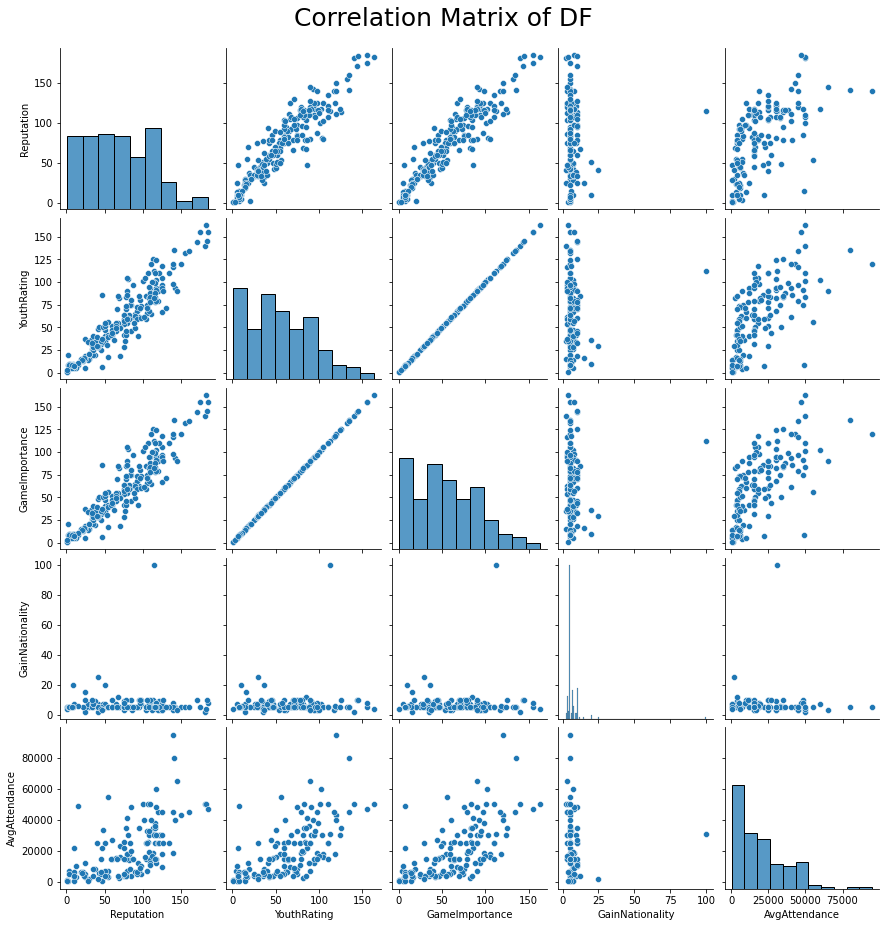

In [182]:
sns.pairplot(df)
plt.suptitle("Correlation Matrix of DF", y=1.03, fontsize=25, fontweight="regular")

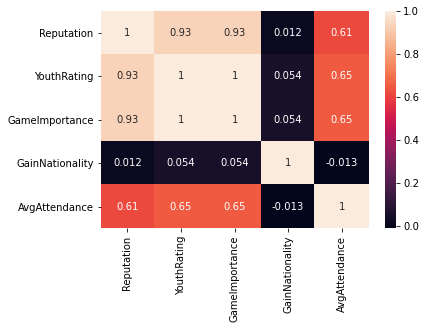

In [184]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [185]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

dfnum = df.select_dtypes(include=numerics)

dfnum.head()

,Reputation,YouthRating,GameImportance,GainNationality,AvgAttendance
1,37.0,19.0,19.0,NaN,8000.0
2,111.0,65.0,65.0,5.0,14800.0
3,117.0,102.0,102.0,7.0,60000.0
4,4.0,5.0,5.0,NaN,NaN
5,51.0,36.0,36.0,20.0,NaN


<Figure size 360x360 with 0 Axes>

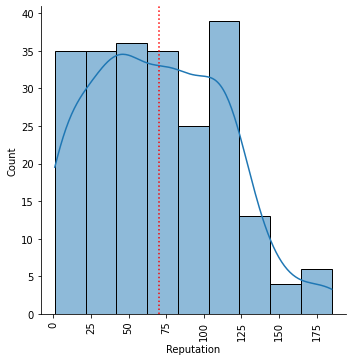

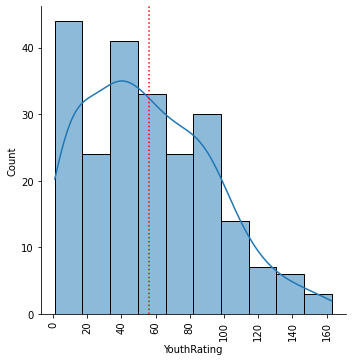

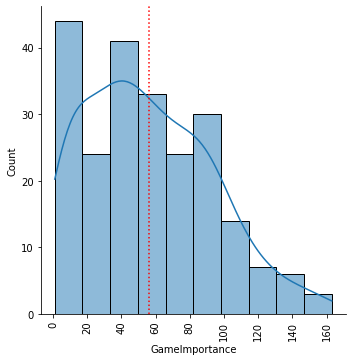

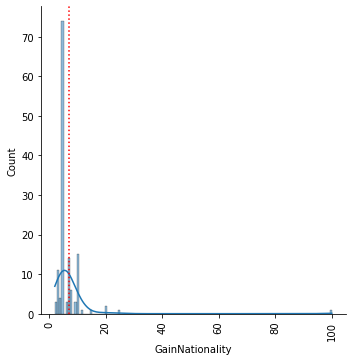

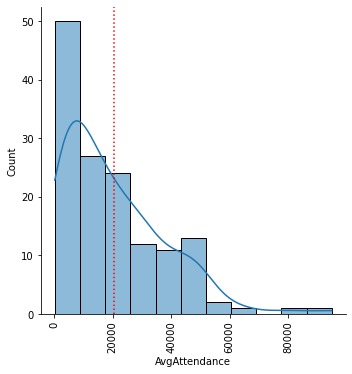

In [204]:
plt.rcParams['figure.figsize'] = [5,5]
for i, col in enumerate(dfnum.columns):
    plt.figure(i)
    sns.displot(data=dfnum, x=col, kde=True)   
    plt.xticks(rotation=90)
    plt.axvline(x=dfnum[col].mean(),
            color='red', ls=':')


Text(0.5, 0.98, 'Youth Rating vs Reputation')

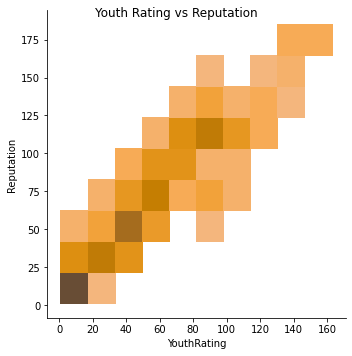

In [211]:
sns.displot(data=dfnum, x='YouthRating', y='Reputation', color='orange')
plt.suptitle("Youth Rating vs Reputation")